In [6]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None
exp_path = Path.cwd().resolve() # experiment path
# visible GPUs
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [7]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Kai's assessment

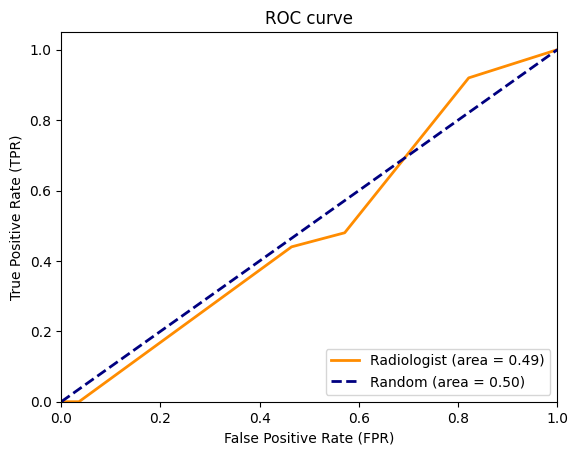

In [14]:
# read the xlsx file
data_path = repo_path / 'assessment/data/radiological_assessment.xlsx'
df = pd.read_excel(data_path)
# get kai's row, the third and keep as dataframe, no series
kai = df.iloc[2:3]
# remove timestamp column
kai = kai.drop(columns=['Timestamp'])
# keep only first 53 columns
kai = kai.iloc[:,0:53]
# change values in all columns if text 'Definitely synthetic' to 1, 'Probably synthetic' to 0.75, 'Not sure' to 0.5, 'Probably real' to 0.25, 'Definitely real' to 0
kai = kai.replace({'Definitely synthetic': 1, 'Probably synthetic': 0.75, 'Not sure': 0.5, 'Probably real': 0.25, 'Definitely real': 0})
# change column names to be positive integers staring from 1
kai.columns = range(1,54)
# add new row, where first 28 columns are 0 and the rest are 1
kai.loc[1] = [0]*28 + [1]*25
# exchange rows to columns
kai = kai.transpose()
# change columnnnames, first to 'kai' and second to 'ground_truth'
kai.columns = ['radiologist', 'ground_truth']
# plot roc curve using scikit-learn
fpr, tpr, thresholds = roc_curve(kai['ground_truth'], kai['radiologist'])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Radiologist (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC curve')
plt.legend(loc="lower right")
plt.show()
# print auc